# <CENTER>OLYMPICS MEDAL PREDICTION

##### DATASET LINK: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

### <I>IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

### <I> LOADING DATASET

In [62]:
df=pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### <I>DATAFRAME ANALYSIS 

In [63]:
df.shape

(271116, 15)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [65]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [66]:
df.duplicated().sum()

1385

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
df['Games'].values.tolist()

['1992 Summer',
 '2012 Summer',
 '1920 Summer',
 '1900 Summer',
 '1988 Winter',
 '1988 Winter',
 '1992 Winter',
 '1992 Winter',
 '1994 Winter',
 '1994 Winter',
 '1992 Winter',
 '1992 Winter',
 '1992 Winter',
 '1992 Winter',
 '1994 Winter',
 '1994 Winter',
 '1994 Winter',
 '1994 Winter',
 '1992 Winter',
 '1992 Winter',
 '1992 Winter',
 '1992 Winter',
 '1994 Winter',
 '1994 Winter',
 '1994 Winter',
 '1994 Winter',
 '1932 Summer',
 '1932 Summer',
 '2002 Winter',
 '1952 Summer',
 '1980 Winter',
 '2000 Summer',
 '1996 Summer',
 '2000 Summer',
 '1994 Winter',
 '1912 Summer',
 '1912 Summer',
 '1920 Summer',
 '1920 Summer',
 '1924 Summer',
 '2014 Winter',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1948 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '1952 Summer',
 '2000 Summer',
 '1948 Summer',
 '1992 Winter',
 '1992 Winter',
 '1992 Winter',
 '1992 W

### <I>PREPROCESSING

In [69]:
df.drop(columns=['ID','Name','Team','Games'],inplace=True)

In [70]:
df.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [71]:
df.shape

(269731, 11)

In [72]:
df['Medal'].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [73]:
df['Medal'].fillna('Missing', inplace=True)
df.head()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Missing
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Missing
2,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Missing
3,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Missing


In [20]:
df['Event'].values.tolist()

["Basketball Men's Basketball",
 "Judo Men's Extra-Lightweight",
 "Football Men's Football",
 "Tug-Of-War Men's Tug-Of-War",
 "Speed Skating Women's 500 metres",
 "Speed Skating Women's 1,000 metres",
 "Speed Skating Women's 500 metres",
 "Speed Skating Women's 1,000 metres",
 "Speed Skating Women's 500 metres",
 "Speed Skating Women's 1,000 metres",
 "Cross Country Skiing Men's 10 kilometres",
 "Cross Country Skiing Men's 50 kilometres",
 "Cross Country Skiing Men's 10/15 kilometres Pursuit",
 "Cross Country Skiing Men's 4 x 10 kilometres Relay",
 "Cross Country Skiing Men's 10 kilometres",
 "Cross Country Skiing Men's 30 kilometres",
 "Cross Country Skiing Men's 10/15 kilometres Pursuit",
 "Cross Country Skiing Men's 4 x 10 kilometres Relay",
 "Cross Country Skiing Men's 10 kilometres",
 "Cross Country Skiing Men's 50 kilometres",
 "Cross Country Skiing Men's 10/15 kilometres Pursuit",
 "Cross Country Skiing Men's 4 x 10 kilometres Relay",
 "Cross Country Skiing Men's 10 kilometres",

In [23]:
df[df['Event']=="Cross Country Skiing Men's 10 kilometres"]

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
10,M,31.0,188.0,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
14,M,33.0,188.0,75.0,USA,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
18,M,31.0,183.0,72.0,USA,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
22,M,33.0,183.0,72.0,USA,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
2520,M,18.0,178.0,70.0,KOR,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
...,...,...,...,...,...,...,...,...,...,...,...
267924,M,22.0,185.0,70.0,UKR,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
269752,M,24.0,NaN,NaN,MGL,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
270264,M,27.0,168.0,75.0,BUL,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing
270268,M,29.0,168.0,75.0,BUL,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Missing


In [37]:
df

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Missing
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Missing
2,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Missing
3,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Missing
...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,Missing
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",Missing
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Missing
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,Missing


In [74]:
df['Event']=df['Event'].map(lambda x:x.split("'s ")[-1])
df

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball,Missing
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Extra-Lightweight,Missing
2,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football,Missing
3,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,500 metres,Missing
...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Doubles,Missing
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Large Hill, Individual",Missing
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Large Hill, Team",Missing
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Four,Missing


In [44]:
df['Event'].value_counts()

Football                                 6745
Ice Hockey                               5516
Hockey                                   5417
Singles                                  4994
Basketball                               4536
                                         ... 
Target Archery, 50 metres, Individual       2
Target Archery, 33 metres, Individual       2
Croquet Mixed Doubles                       2
Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics               1
Name: Event, Length: 537, dtype: int64

In [45]:
df[df['Event']=='Target Archery, 50 metres, Individual']

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
30491,M,44.0,NaN,NaN,FRA,1920,Summer,Antwerpen,Archery,"Target Archery, 50 metres, Individual",Gold
249073,M,54.0,NaN,NaN,BEL,1920,Summer,Antwerpen,Archery,"Target Archery, 50 metres, Individual",Silver


In [48]:
df['Age'].fillna(0.0,inplace=True)

In [49]:
df['Age'].isnull().sum()

0

In [57]:
df['Age']=df['Age'].astype(int)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     269731 non-null  object 
 1   Age     269731 non-null  int32  
 2   Height  210917 non-null  float64
 3   Weight  208204 non-null  float64
 4   NOC     269731 non-null  object 
 5   Year    269731 non-null  int64  
 6   Season  269731 non-null  object 
 7   City    269731 non-null  object 
 8   Sport   269731 non-null  object 
 9   Event   269731 non-null  object 
 10  Medal   269731 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 23.7+ MB


### <I> EDA

In [75]:
df.Age.skew()

1.5617967856793484

In [76]:
import seaborn as sns

<AxesSubplot: >

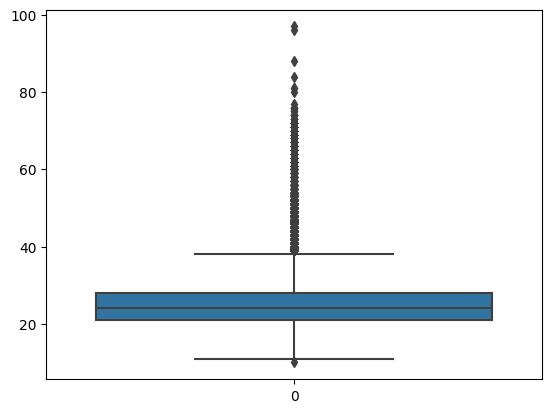

In [77]:
sns.boxplot(df['Age'])

In [79]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Niteesh\AppData\Local\Temp\ipykernel_13492\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

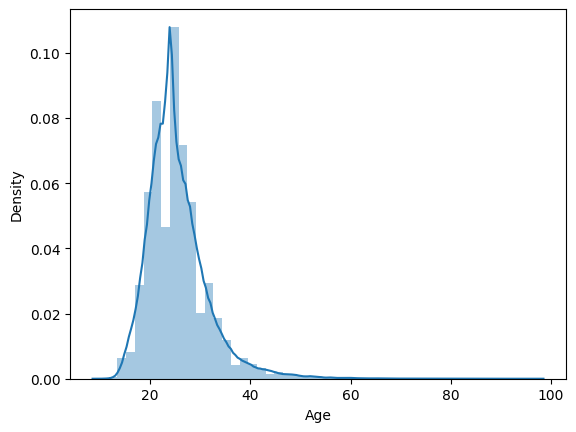

In [84]:
sns.distplot(df['Age'])

In [80]:
df['Age'].isnull().sum()

0

In [81]:
df['Height'].skew()

0.01864286162496677

C:\Users\Niteesh\AppData\Local\Temp\ipykernel_13492\3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<AxesSubplot: xlabel='Height', ylabel='Density'>

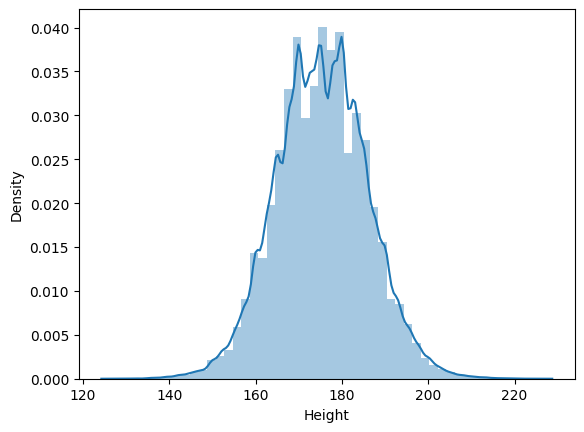

In [83]:
sns.distplot(df['Height'])

In [85]:
df['Weight'].skew()

0.797266456260407

C:\Users\Niteesh\AppData\Local\Temp\ipykernel_13492\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

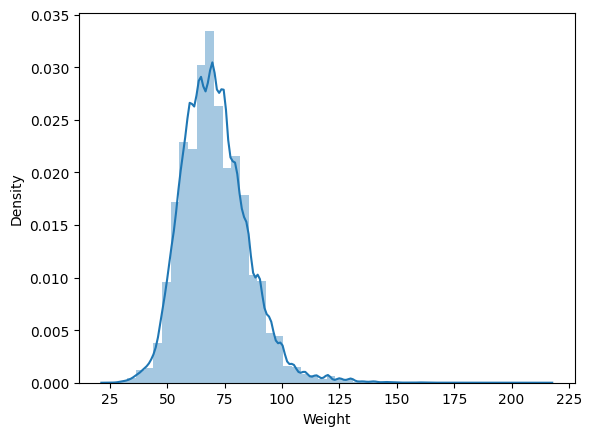

In [86]:
sns.distplot(df['Weight'])

### <I> FILLING MISSING VALUES (IMPUTING)

In [96]:
from sklearn.impute import KNNImputer

In [98]:
knn=KNNImputer(weights='distance')
df[['Height','Weight']]=knn.fit_transform(df[['Height','Weight']])

In [99]:
df.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [89]:
df['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

In [91]:
df['NOC'].value_counts().index.tolist()

['USA',
 'FRA',
 'GBR',
 'ITA',
 'GER',
 'CAN',
 'JPN',
 'SWE',
 'AUS',
 'HUN',
 'POL',
 'SUI',
 'NED',
 'URS',
 'FIN',
 'ESP',
 'RUS',
 'CHN',
 'AUT',
 'NOR',
 'KOR',
 'ROU',
 'TCH',
 'BRA',
 'BEL',
 'DEN',
 'BUL',
 'FRG',
 'ARG',
 'GRE',
 'MEX',
 'GDR',
 'YUG',
 'UKR',
 'CUB',
 'NZL',
 'CZE',
 'BLR',
 'RSA',
 'EGY',
 'POR',
 'KAZ',
 'IND',
 'TUR',
 'IRL',
 'SLO',
 'TPE',
 'COL',
 'SVK',
 'LUX',
 'LAT',
 'PUR',
 'VEN',
 'CHI',
 'NGR',
 'EST',
 'CRO',
 'EUN',
 'JAM',
 'PRK',
 'IRI',
 'KEN',
 'THA',
 'PHI',
 'HKG',
 'MAR',
 'ISR',
 'LTU',
 'ISL',
 'URU',
 'PAK',
 'TUN',
 'ALG',
 'MGL',
 'PER',
 'MAS',
 'UZB',
 'GUA',
 'INA',
 'SEN',
 'SRB',
 'ETH',
 'TTO',
 'BAH',
 'LIE',
 'GHA',
 'SGP',
 'LIB',
 'SCG',
 'CMR',
 'ZIM',
 'ISV',
 'GEO',
 'KUW',
 'AZE',
 'DOM',
 'ECU',
 'ANG',
 'CRC',
 'UGA',
 'MDA',
 'FIJ',
 'IRQ',
 'KSA',
 'KGZ',
 'CYP',
 'ARM',
 'BAR',
 'ESA',
 'BER',
 'MON',
 'CIV',
 'QAT',
 'HON',
 'ZAM',
 'SMR',
 'AND',
 'TAN',
 'SYR',
 'VIE',
 'BOH',
 'BOL',
 'SRI',
 'MRI',
 'UAE',


In [92]:
df['Season'].value_counts()

Summer    221167
Winter     48564
Name: Season, dtype: int64

In [93]:
df['City'].value_counts()

London                    22297
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11919
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7008
Berlin                     6251
Sochi                      4891
Melbourne                  4829
Amsterdam                  4656
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [95]:
df["Sport"].value_counts().index.tolist()

['Athletics',
 'Gymnastics',
 'Swimming',
 'Shooting',
 'Cycling',
 'Fencing',
 'Rowing',
 'Cross Country Skiing',
 'Alpine Skiing',
 'Wrestling',
 'Football',
 'Sailing',
 'Equestrianism',
 'Canoeing',
 'Boxing',
 'Speed Skating',
 'Ice Hockey',
 'Hockey',
 'Biathlon',
 'Basketball',
 'Weightlifting',
 'Water Polo',
 'Judo',
 'Handball',
 'Volleyball',
 'Bobsleigh',
 'Tennis',
 'Diving',
 'Ski Jumping',
 'Archery',
 'Figure Skating',
 'Art Competitions',
 'Table Tennis',
 'Modern Pentathlon',
 'Short Track Speed Skating',
 'Luge',
 'Badminton',
 'Nordic Combined',
 'Freestyle Skiing',
 'Snowboarding',
 'Synchronized Swimming',
 'Baseball',
 'Rhythmic Gymnastics',
 'Taekwondo',
 'Beach Volleyball',
 'Triathlon',
 'Softball',
 'Curling',
 'Rugby Sevens',
 'Golf',
 'Skeleton',
 'Tug-Of-War',
 'Rugby',
 'Trampolining',
 'Polo',
 'Lacrosse',
 'Alpinism',
 'Cricket',
 'Military Ski Patrol',
 'Croquet',
 'Motorboating',
 'Racquets',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Aeronautics'

### <I>SPLITTING DATA

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Medal'),df['Medal'],test_size=0.2,random_state=1)

In [116]:
x_train.shape

(215784, 10)

### <I>FEATURE ENGINEERING

In [117]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [118]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [119]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [112]:
y_train

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [121]:
y_test

array([1, 2, 2, ..., 1, 2, 2])

### <I>PIPELINE

In [127]:
cat_col=['Sex','NOC','Season', 'City', 'Sport', 'Event']
cat=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first',dtype=np.int32,handle_unknown='ignore'),cat_col)
])

In [128]:
final=Pipeline(steps=[
    ('prep',cat),
    ('model',RandomForestClassifier())
])

In [129]:
final.fit(x_train,y_train)

C:\Users\Niteesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Sex', 'NOC', 'Season',
                                                   'City', 'Sport',
                                                   'Event'])])),
                ('model', RandomForestClassifier())])

In [130]:
y_pred=final.predict(x_test)

C:\Users\Niteesh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### <I>TESTING

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
accuracy_score(y_test,y_pred)

0.9210336070587799

In [133]:
confusion_matrix(y_test,y_pred)

array([[ 1453,    83,  1009,    58],
       [   72,  1572,   939,    80],
       [  326,   327, 45082,   298],
       [   53,   100,   915,  1580]], dtype=int64)

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.56      0.64      2603
           1       0.76      0.59      0.66      2663
           2       0.94      0.98      0.96     46033
           3       0.78      0.60      0.68      2648

    accuracy                           0.92     53947
   macro avg       0.81      0.68      0.74     53947
weighted avg       0.91      0.92      0.92     53947

